In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv 

In [2]:
dataset = np.load('data/chinese-handwritten-dataset.npz',allow_pickle=True)

train_data = dataset['train']
train_labels = dataset['target']
test_data = dataset['test']

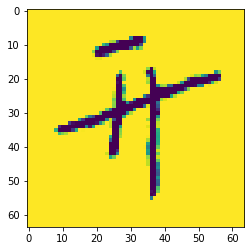

In [3]:
plt.imshow(train_data[4])

In [4]:
train_data.shape, train_labels.shape, test_data.shape

((53195, 64, 64), (53195,), (10000, 64, 64))

In [5]:
pd.DataFrame(train_labels).nunique()

0    70
dtype: int64

In [6]:
train_labels_df = pd.DataFrame(train_labels)

In [7]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_labels_df["y_codes"] = label.fit_transform(train_labels)

In [8]:
# binarisation des images
for i in range(53195):
    (thresh, train_data[i]) = cv.threshold(train_data[i], 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

train_data/255;

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Define X_data and target
X = np.array(train_data.copy())
y = np.array(train_labels_df['y_codes'].copy())

# Stratified train_test split on labels
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=.2, 
                                                  stratify = y, 
                                                  random_state=42)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LeakyReLU,GlobalMaxPooling2D
from tensorflow.keras.metrics import top_k_categorical_accuracy,categorical_accuracy
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

In [11]:
def top_3_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

In [13]:
from tensorflow import keras

In [14]:
X_train = X_train.reshape(len(X_train), 64*64)
X_train = X_train/255

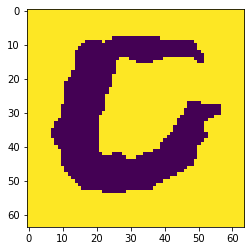

In [15]:
plt.imshow(X_train[1].reshape(64,64))

In [17]:
model = Sequential([
    keras.layers.Dense(128, input_shape=(64*64,),activation = 'relu'),
    keras.layers.Dense(264, activation="sigmoid"),
    keras.layers.Dense(264, activation="relu"),

    keras.layers.Dense(70 ,activation = 'sigmoid')
    
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy', top_3_categorical_accuracy]
)

model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
1330/1330 [==============================] - 10s 7ms/step - loss: 2.9653 - accuracy: 0.2617 - top_3_categorical_accuracy: 0.0589
Epoch 2/30
1330/1330 [==============================] - 9s 7ms/step - loss: 1.8690 - accuracy: 0.4960 - top_3_categorical_accuracy: 0.0359
Epoch 3/30
1330/1330 [==============================] - 8s 6ms/step - loss: 1.5492 - accuracy: 0.5781 - top_3_categorical_accuracy: 0.0353
Epoch 4/30
1330/1330 [==============================] - 8s 6ms/step - loss: 1.3590 - accuracy: 0.6214 - top_3_categorical_accuracy: 0.0356
Epoch 5/30
1330/1330 [==============================] - 8s 6ms/step - loss: 1.2276 - accuracy: 0.6540 - top_3_categorical_accuracy: 0.0348
Epoch 6/30
1330/1330 [==============================] - 9s 6ms/step - loss: 1.1314 - accuracy: 0.6791 - top_3_categorical_accuracy: 0.0350
Epoch 7/30
1330/1330 [==============================] - 8s 6ms/step - loss: 1.0498 - accuracy: 0.7014 - top_3_categorical_accuracy: 0.0348
Epoch 8/30
1330/1330 [====

## accuracy 

In [18]:
X_val = X_val.reshape(len(X_val), 64*64)
X_val = X_val/255

In [19]:
model.evaluate(X_val, y_val)

333/333 [==============================] - 2s 4ms/step - loss: 1.1546 - accuracy: 0.7265 - top_3_categorical_accuracy: 0.0324


[1.154628038406372, 0.7264780402183533, 0.03242785856127739]

## submission

In [20]:
for i in range(test_data.shape[0]):
    (thresh1, test_data[i]) = cv.threshold(train_data[i], 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

In [21]:
test_data = test_data.reshape(len(test_data), 64*64)
test_data = test_data/255

In [22]:
ynew = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [23]:
a= np.zeros(10000)
for i in range(10000):
    a[i] = ynew[i].argmax()

In [24]:
lack = train_labels_df.drop_duplicates(subset = "y_codes")
lack['symbols'] = lack[0]

C:\Users\BRAHIM~1\AppData\Local\Temp/ipykernel_12828/3194733911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lack['symbols'] = lack[0]


In [25]:
lack

,0,y_codes,symbols
0,开,31,开
599,发,18,发
1199,者,58,者
1801,节,60,节
2399,是,38,是
...,...,...,...
48157,趋,67,趋
48754,势,16,势
49952,绝,57,绝
50551,佳,12,佳


In [27]:
dicti = dict(zip(lack.y_codes, lack.symbols))
dicti

{31: '开',
 18: '发',
 58: '者',
 60: '节',
 38: '是',
 49: '由',
 66: '谷',
 43: '歌',
 20: '团',
 11: '体',
 55: '组',
 56: '织',
 50: '的',
 27: '年',
 29: '度',
 34: '技',
 41: '术',
 44: '活',
 15: '动',
 37: '旨',
 21: '在',
 4: '为',
 25: '学',
 48: '生',
 2: '专',
 3: '业',
 6: '人',
 23: '士',
 8: '以',
 17: '及',
 33: '所',
 40: '有',
 26: '对',
 52: '科',
 69: '领',
 22: '域',
 14: '充',
 45: '满',
 46: '热',
 32: '情',
 35: '提',
 13: '供',
 10: '会',
 65: '议',
 19: '和',
 51: '研',
 64: '讨',
 0: '。',
 68: '这',
 61: '被',
 63: '认',
 7: '他',
 9: '们',
 1: '与',
 47: '爱',
 24: '好',
 30: '建',
 53: '立',
 59: '联',
 54: '系',
 28: '并',
 5: '了',
 62: '解',
 39: '最',
 36: '新',
 67: '趋',
 16: '势',
 57: '绝',
 12: '佳',
 42: '机'}

In [29]:
submission = pd.read_csv('assets/submission.txt')
submission["prediction"] = a

In [30]:
submission['target'] = submission['prediction'].map(dicti)

In [31]:
submission

,image,target,prediction
0,0,开,31.0
1,1,开,31.0
2,2,开,31.0
3,3,开,31.0
4,4,开,31.0
...,...,...,...
9995,9995,年,27.0
9996,9996,学,25.0
9997,9997,年,27.0
9998,9998,年,27.0


In [32]:
f = submission[["image", 'target']]

In [33]:
f.to_csv(r'C:\Users\brahim saadi\Desktop\devfest\chines\Chinese\submission.txt', header=True, index=None, sep=',', mode='a')